In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/train'

In [3]:
#buat database
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(227, 227), batch_size=8)
print(data.class_names)
class_names = data.class_names

Found 307 files belonging to 3 classes.
['Durian', 'Pisang', 'Strawberry']


In [4]:
#ubah dataset menjadi numpy array
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

data_iterator NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001E186631110>)


In [5]:
#bagi data menjadi batch
batch = data_iterator.next()
print("batch", batch)

batch (array([[[[1.88000000e+02, 1.84000000e+02, 1.85000000e+02],
         [1.88323792e+02, 1.84323792e+02, 1.85323792e+02],
         [1.89539642e+02, 1.85539642e+02, 1.86539642e+02],
         ...,
         [2.01000000e+02, 1.98000000e+02, 1.93000000e+02],
         [2.01000000e+02, 1.98000000e+02, 1.93000000e+02],
         [2.00107910e+02, 1.97107910e+02, 1.92107910e+02]],

        [[1.88076553e+02, 1.84076553e+02, 1.85076553e+02],
         [1.88803391e+02, 1.84803391e+02, 1.85803391e+02],
         [1.89539642e+02, 1.85539642e+02, 1.86539642e+02],
         ...,
         [2.01000000e+02, 1.98000000e+02, 1.93000000e+02],
         [2.01000000e+02, 1.98000000e+02, 1.93000000e+02],
         [2.00740631e+02, 1.97740631e+02, 1.92740631e+02]],

        [[1.88567719e+02, 1.84567719e+02, 1.85567719e+02],
         [1.89166885e+02, 1.85166885e+02, 1.86166885e+02],
         [1.90055054e+02, 1.86055054e+02, 1.87055054e+02],
         ...,
         [2.01515411e+02, 1.98515411e+02, 1.93515411e+02],
   

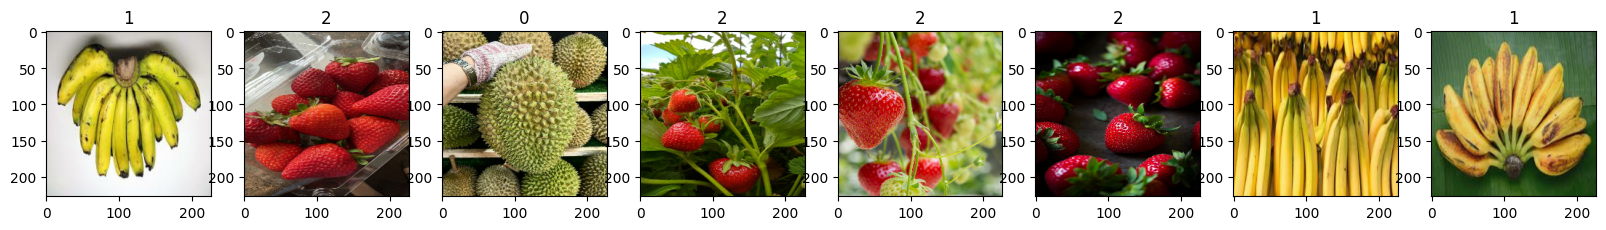

In [6]:
#tampilkan gambar yang akan digunakan untuk melatih model menggunakan library matplotlib
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
#normalisasi data
data = data.map(lambda x, y: (x/255.0, y))
print("Data type after normalization: {}".format(data.element_spec))
print("Data shape after normalization: {}".format(data.element_spec))
print("Jumlah data", len(data))

Data type after normalization: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Data shape after normalization: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 39


In [8]:
# bagi data menjadi train, validation, dan test set dengan rasio 80:10:10
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.1)

print(train_size)
print(val_size)
print(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

31
3
3


In [9]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D
import keras.layers as layers

alexnet_model = Sequential()

alexnet_model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(227, 227, 3)))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
alexnet_model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),  strides=(1, 1), activation="relu", padding="same"))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
alexnet_model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu",padding="same"))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.MaxPool2D(pool_size=(1, 1), strides=(2, 2)))
alexnet_model.add(layers.Flatten())
alexnet_model.add(layers.Dense(4096, activation="relu"))
alexnet_model.add(layers.Dropout(0.5))
alexnet_model.add(layers.Dense(10, activation="softmax"))

alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
alexnet_model.summary()

# Train the model
history_alexnet = alexnet_model.fit(train, epochs=50, validation_data=val)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      51,384,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,177,994 (210.49 MB)

 Trainable params: 55,175,242 (210.48 MB)

 Non-trainable params: 2,752 (10.75 KB)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 879ms/step - accuracy: 0.5335 - loss: 8.2277 - val_accuracy: 0.2083 - val_loss: 1798.5312
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 754ms/step - accuracy: 0.6461 - loss: 14.3225 - val_accuracy: 0.3333 - val_loss: 287.7491
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 747ms/step - accuracy: 0.7507 - loss: 9.7530 - val_accuracy: 0.8333 - val_loss: 30.0047
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 755ms/step - accuracy: 0.7172 - loss: 6.8618 - val_accuracy: 0.5000 - val_loss: 335.2870
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 754ms/step - accuracy: 0.7713 - loss: 7.7184 - val_accuracy: 0.7500 - val_loss: 15.2788
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 747ms/step - accuracy: 0.7207 - loss: 10.4721 - val_accuracy: 0.6667 - val_loss: 14.6363
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 752ms/step - accuracy: 0.7483 - loss: 6.7689 - val_accuracy: 0.7500 - val_loss: 8.8577
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 23s 751ms/step - accuracy: 0.8160 - loss: 4.025

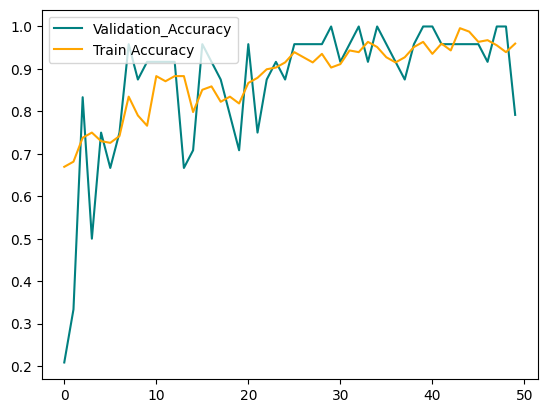

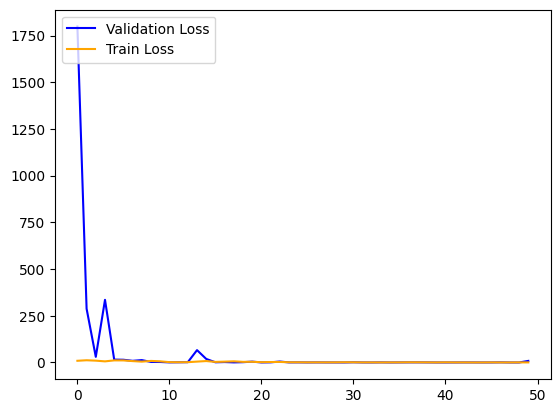

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9635 - loss: 0.4843  


[0.553476870059967, 0.9583333134651184]

In [10]:
fig = plt.figure()
plt.plot(history_alexnet.history['val_accuracy'], color='teal', label='Validation_Accuracy')
plt.plot(history_alexnet.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history_alexnet.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history_alexnet.history['loss'], color='orange', label='Train Loss')
plt.legend(loc="upper left")
plt.show()

alexnet_model.evaluate(test)

In [11]:
# Save the model
alexnet_model.save('C:/Users/Asus/Downloads/PMDPM/TUBES ML2/alexnet_buah.h5')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()

#Computer visioin
import tensorflow as tf
import cv
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('C:/Users/Asus/Downloads/PMDPM/TUBES ML2/alexnet_buah.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


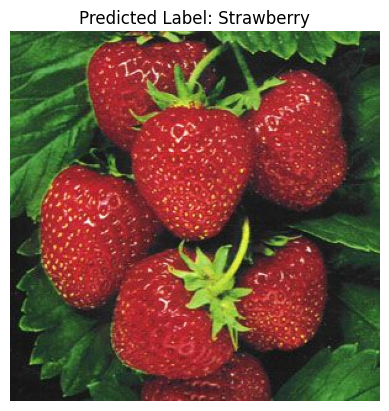

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


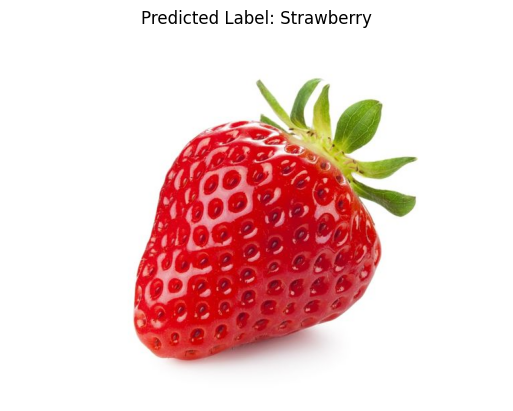

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


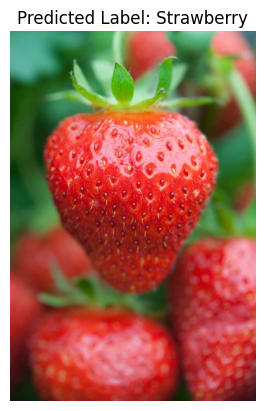

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


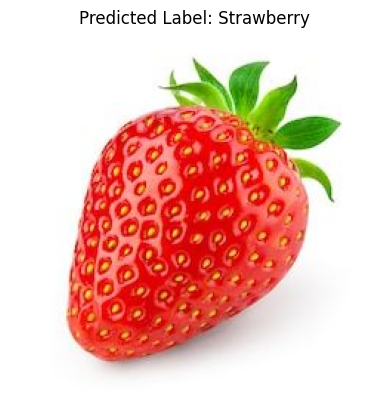

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


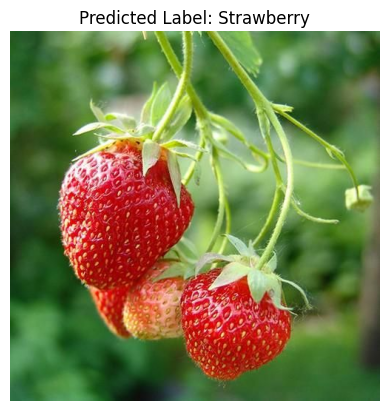

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[2.7509916e-18 7.8545573e-12 1.0000000e+00 1.4326532e-22 6.6037615e-20
  2.1396442e-22 2.3765436e-21 1.5748935e-26 1.4077071e-20 4.7366276e-21]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


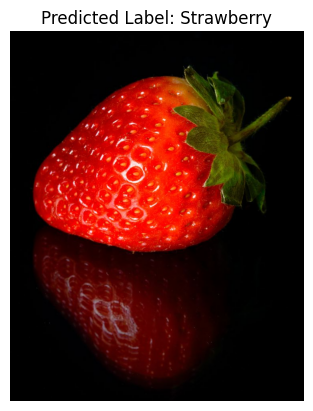

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


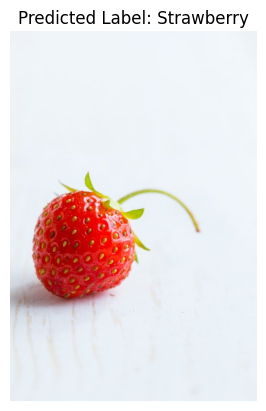

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[9.383073e-37 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


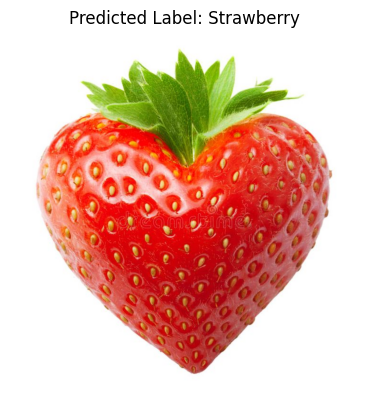

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


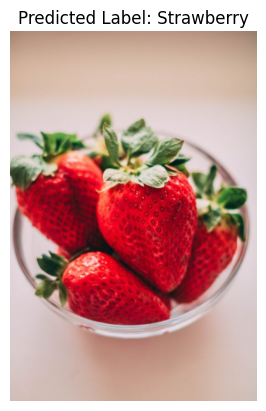

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


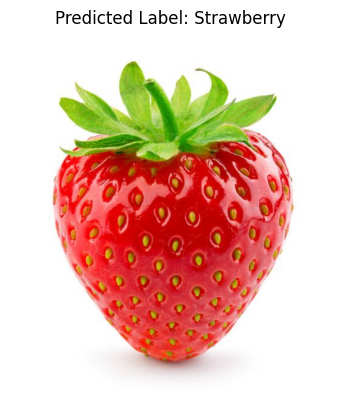

Predicted Label: Strawberry
Confidence: 100.00%
Pred : [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
# Folder containing the images
image_folder = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/test/Strawberry'

# List of images in the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Class names
class_names = ['Durian', 'Pisang', 'Strawberry']

# Predict and annotate each image
for image_file in image_files:
    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize image for the model
    input_image = cv2.resize(img_rgb, (227,227))
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Predict using the model
    pred = model.predict(input_image)
    label_index = np.argmax(pred)
    confidence = pred[0][label_index] * 100

    predicted_label = class_names[label_index]

    # Display the image with Matplotlib
    plt.figure()
    plt.title(f'Predicted Label: {predicted_label}')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {confidence:.2f}%')
    print(f'Pred : {pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


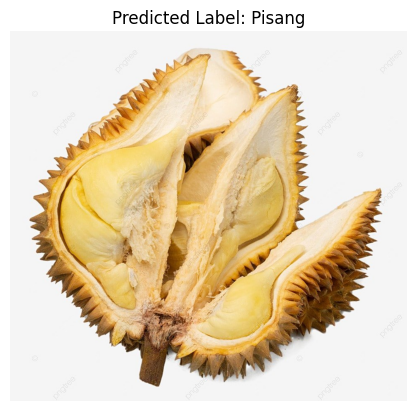

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[7.5611754e-28 1.0000000e+00 0.0000000e+00 0.0000000e+00 4.3311770e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


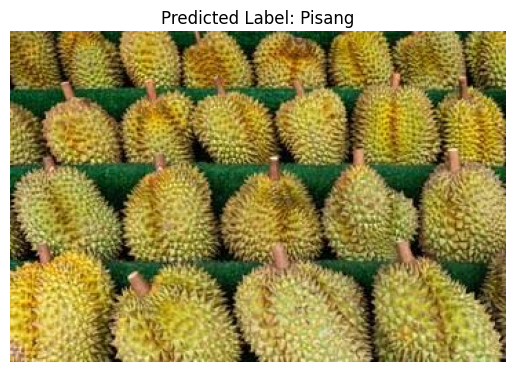

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[3.7817873e-22 1.0000000e+00 3.9661024e-32 1.9893694e-36 3.3622993e-35
  8.6313062e-37 2.2726317e-37 1.6345029e-34 0.0000000e+00 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


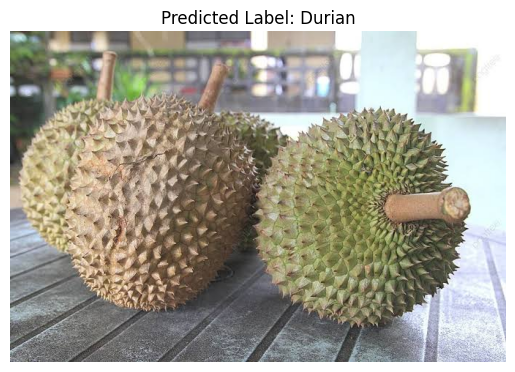

Predicted Label: Durian
Confidence: 100.00%
Pred : [[1.00000000e+00 1.89711158e-09 1.90324449e-12 1.33594839e-17
  2.90688234e-16 4.82181393e-16 1.26463334e-17 1.42198485e-17
  6.66547183e-18 6.94420692e-16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


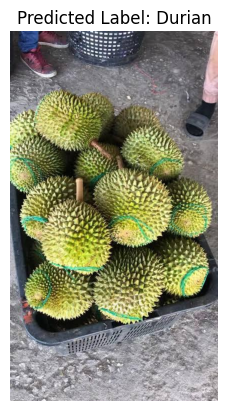

Predicted Label: Durian
Confidence: 99.87%
Pred : [[9.9871767e-01 1.2824131e-03 2.4771504e-11 1.6238780e-13 1.0064486e-12
  3.1863212e-12 9.6289059e-14 1.0150733e-13 3.1491980e-13 7.7044118e-14]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


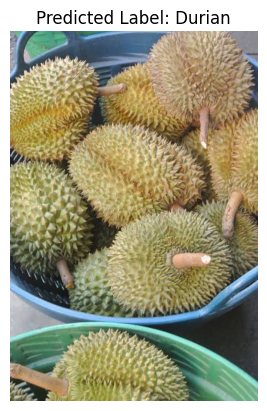

Predicted Label: Durian
Confidence: 99.91%
Pred : [[9.9906975e-01 9.3031570e-04 7.6364837e-13 9.9347647e-14 2.9412359e-17
  4.5494368e-15 1.2727643e-13 3.4545373e-16 6.5503864e-16 3.2408196e-13]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


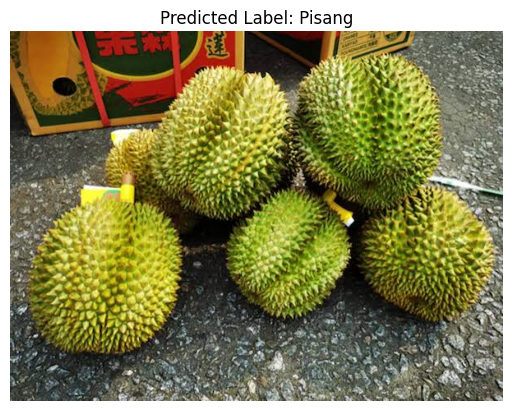

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[3.1302207e-27 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


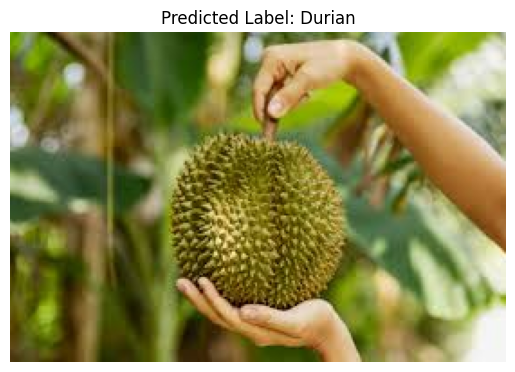

Predicted Label: Durian
Confidence: 99.94%
Pred : [[9.9938452e-01 6.1545603e-04 2.2155903e-16 1.7071352e-20 1.0758580e-23
  3.1544717e-23 2.0381589e-21 1.0377296e-23 2.3431662e-24 4.6108319e-19]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


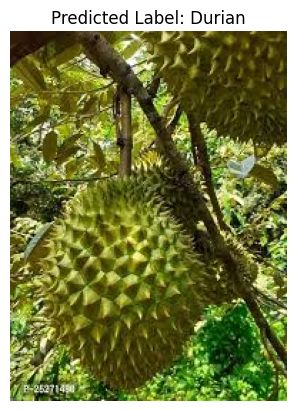

Predicted Label: Durian
Confidence: 99.56%
Pred : [[9.9562705e-01 4.2912997e-03 8.1640937e-05 6.3660595e-20 2.8926762e-19
  4.2297726e-20 4.7781050e-18 8.9091462e-20 7.9186852e-24 1.3730765e-18]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


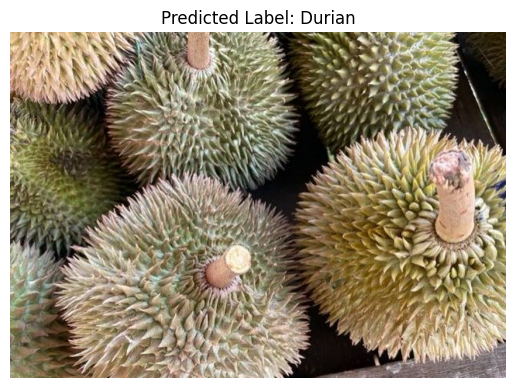

Predicted Label: Durian
Confidence: 100.00%
Pred : [[1.0000000e+00 7.8527707e-32 2.4185486e-22 1.7652707e-34 3.0988192e-35
  0.0000000e+00 4.6938502e-38 0.0000000e+00 5.0653588e-38 6.8123449e-36]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


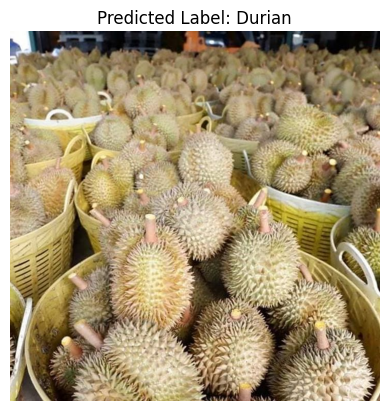

Predicted Label: Durian
Confidence: 100.00%
Pred : [[9.9999952e-01 2.6624871e-08 4.8987846e-07 8.3903278e-13 6.5136468e-14
  7.7902069e-15 1.9800483e-13 4.6553820e-16 4.7265279e-13 1.0080864e-12]]


In [36]:
# Folder containing the images
image_folder = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/test/Durian'

# List of images in the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Class names
class_names = ['Durian', 'Pisang', 'Strawberry']

# Predict and annotate each image
for image_file in image_files:
    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize image for the model
    input_image = cv2.resize(img_rgb, (227,227))
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Predict using the model
    pred = model.predict(input_image)
    label_index = np.argmax(pred)
    confidence = pred[0][label_index] * 100

    predicted_label = class_names[label_index]

    # Display the image with Matplotlib
    plt.figure()
    plt.title(f'Predicted Label: {predicted_label}')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {confidence:.2f}%')
    print(f'Pred : {pred}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


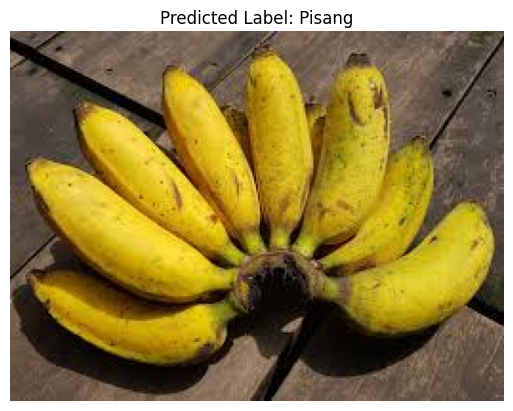

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


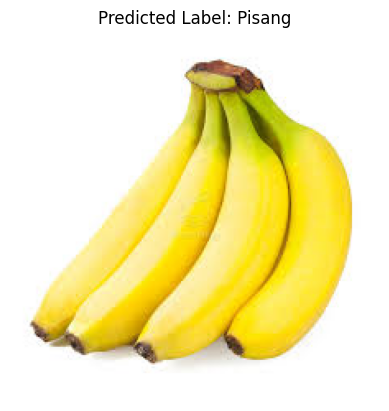

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


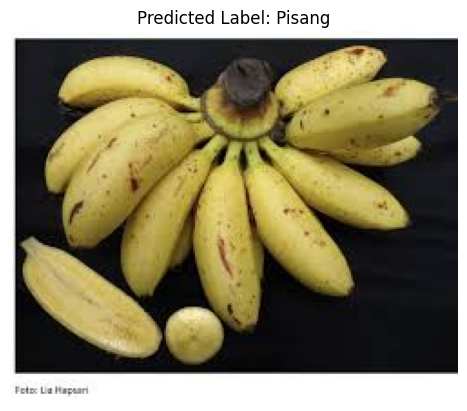

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[6.104068e-13 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


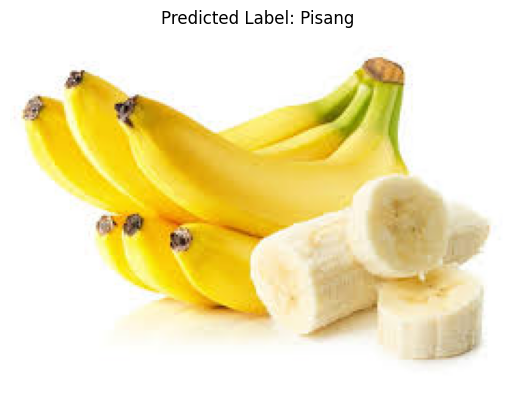

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


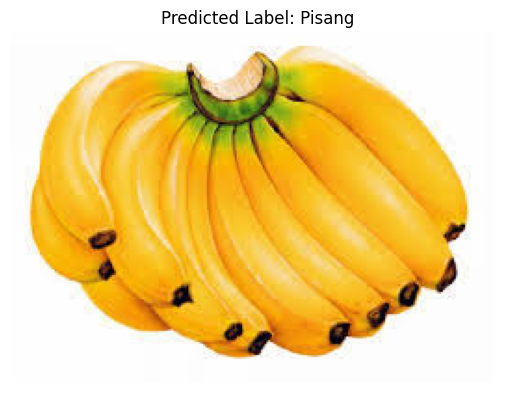

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


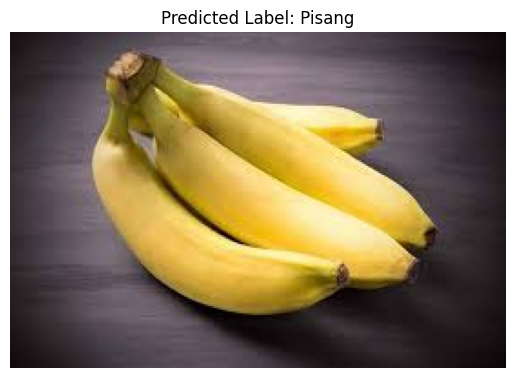

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


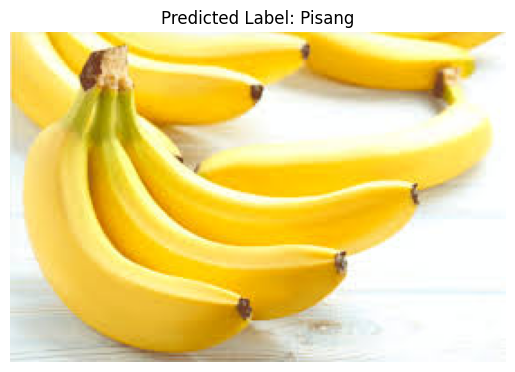

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


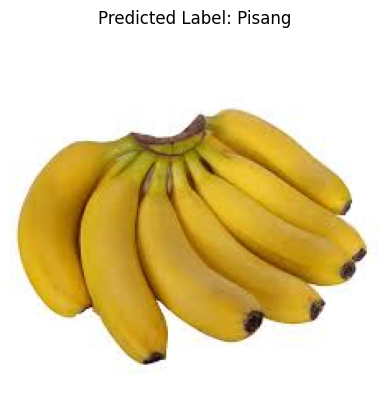

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


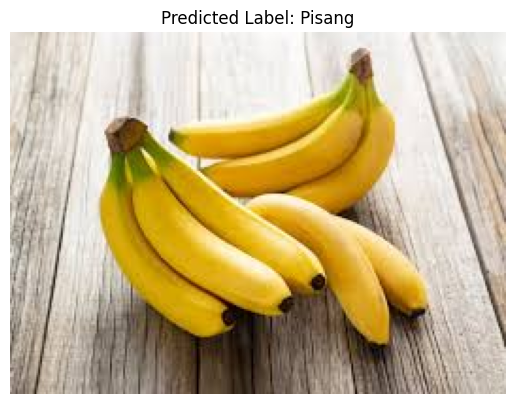

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


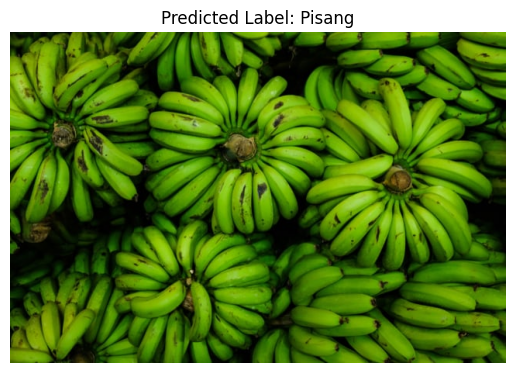

Predicted Label: Pisang
Confidence: 100.00%
Pred : [[2.4042418e-32 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [35]:
# Folder containing the images
image_folder = 'C:/Users/Asus/Downloads/PMDPM/TUBES ML2/dataset/test/Pisang'

# List of images in the folder
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder)]

# Class names
class_names = ['Durian', 'Pisang', 'Strawberry']

# Predict and annotate each image
for image_file in image_files:
    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize image for the model
    input_image = cv2.resize(img_rgb, (227,227))
    input_image = input_image / 255.0
    input_image = np.expand_dims(input_image, axis=0)

    # Predict using the model
    pred = model.predict(input_image)
    label_index = np.argmax(pred)
    confidence = pred[0][label_index] * 100

    predicted_label = class_names[label_index]

    # Display the image with Matplotlib
    plt.figure()
    plt.title(f'Predicted Label: {predicted_label}')
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {confidence:.2f}%')
    print(f'Pred : {pred}')
